In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 1 #June 22nd, 2023
current_version = 2 #July 11th, 2023
current_version = 3 #July 21th, 2023
current_version = 4 #July 31th, 2023
current_version = 5 #Aug 2nd, 2023
current_version = 6 #Aug 12th, 2023

stdfont = 14
stdyfrac = 0.06

In [8]:
animals = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','AE_235','AE_236','TH_237','AE_252']

In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_19
Fetching files for DS_22
Fetching files for DS_23
Fetching files for DS_24
Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_13
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_252
Fetching files for AE_254
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
Fetching files for AE_267
Fetching files for AO_273
Fetching files for AO_274
Fetching files for AE_287
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
Error loading P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse f

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


[ 9 10 11 12 13]
[15 16 17 18 19 20 21 23 24 25]


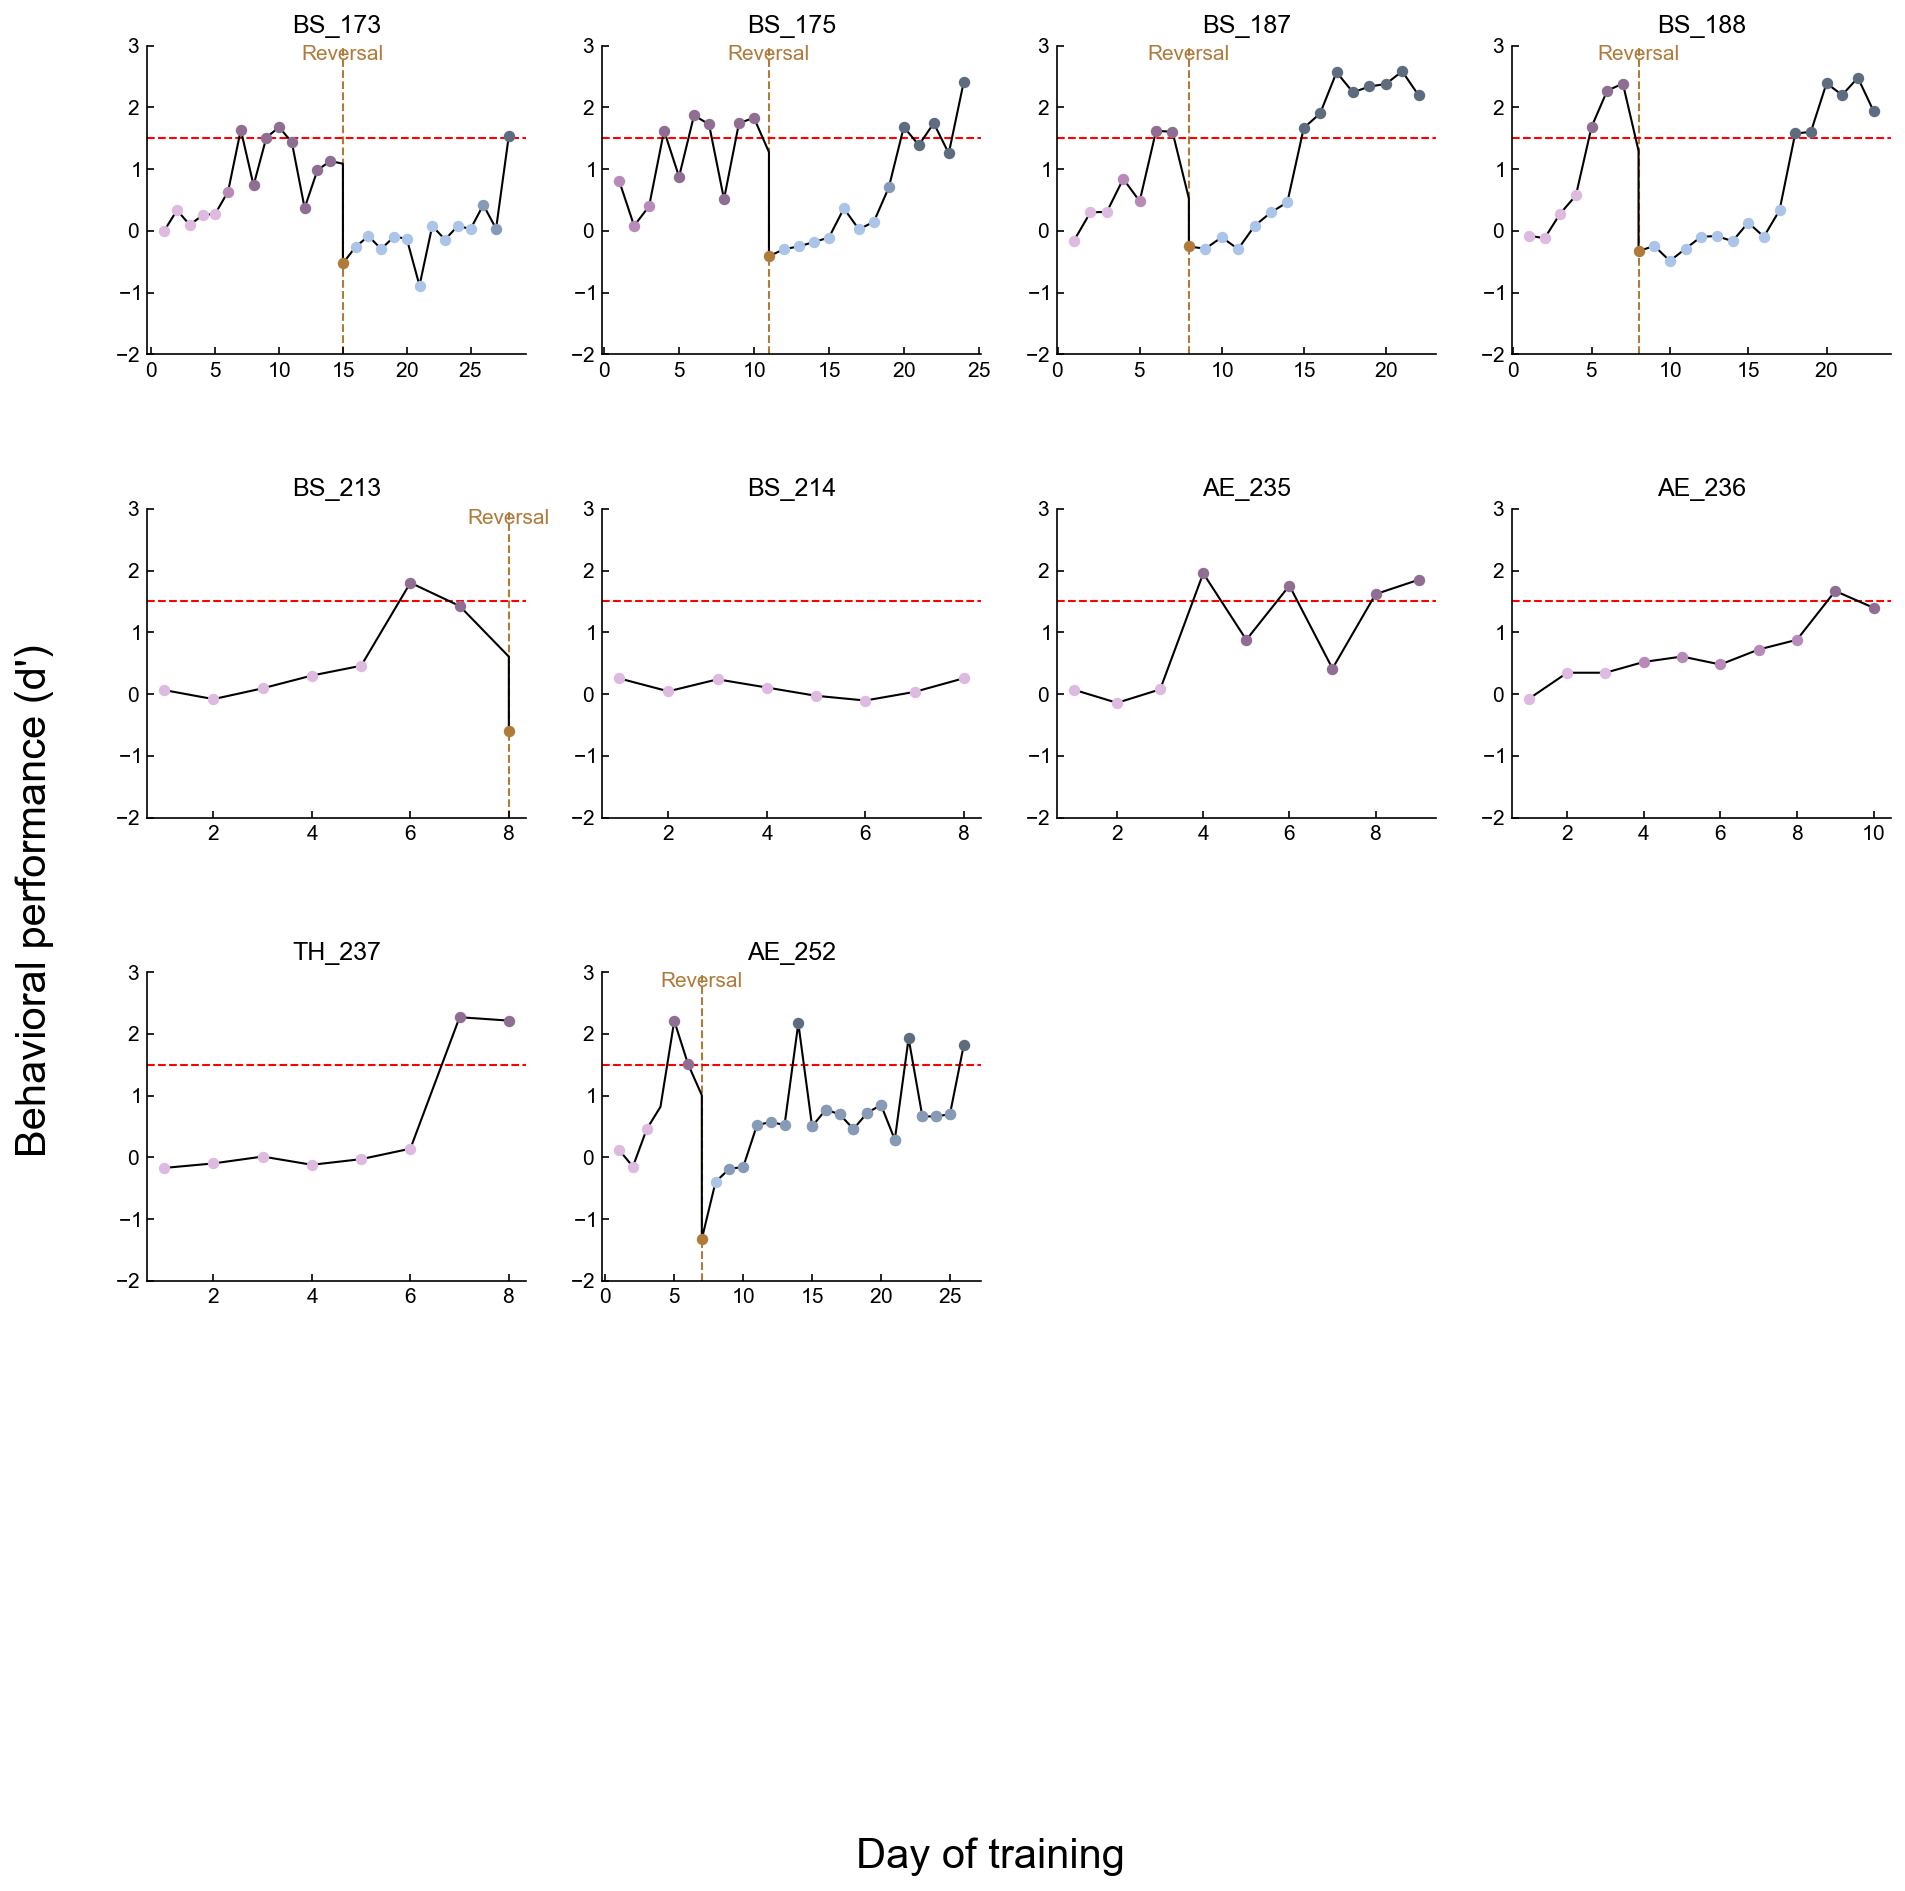

In [58]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)

In [59]:
animals

['BS_173',
 'BS_175',
 'BS_187',
 'BS_188',
 'BS_213',
 'BS_214',
 'AE_235',
 'AE_236',
 'TH_237',
 'AE_252']

In [60]:
EnumSession

['AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_1_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2_tuning_AC.pickle',
 'AE_235_2

In [61]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task not in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 728/728 [00:11<00:00, 60.95it/s] 


In [62]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 2178/2178 [01:01<00:00, 35.25it/s] 

errors for: []


In [63]:
def CalculateBestFrequencies(sessionfile,clust):
    tones_to_consider = np.sort(np.unique(sessionfile.tuning.trial_freqs))
    tuning_FRs = np.full_like(tones_to_consider,np.nan,dtype=np.float)

#     clust_spikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    
    for idx,tone in enumerate(tones_to_consider):
        this_tuning = sessionfile.tuning.tuning_responsiveness[clust][str(tone)].FRevoked
        tuning_FRs[idx] = this_tuning
    
    if np.sum(np.logical_and(np.isfinite(tuning_FRs),np.greater(tuning_FRs,0))) == 0:
        return []
    
    maxidxs = np.argwhere(tuning_FRs >= np.nanmax(tuning_FRs)*1)
    best_frequencies = tones_to_consider[maxidxs]
    best_frequencies = np.concatenate(best_frequencies)
    return best_frequencies

In [56]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []
FRmod_switch = []

BFreq_preearly = []
BFreq_prelate = []
BFreq_preexpert = []
BFreq_postearly = []
BFreq_postlate = []
BFreq_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    try:
        FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    except Exception as e:
        FRmod = np.nan
        print(e)
        
    best_freqs = CalculateBestFrequencies(sessionfile,clust)
    if len(best_freqs) > 1:
        if 11260 in best_freqs:
            best_freq = 11260
        elif 5648 in best_freqs:
            best_freq = 5648
        else:
            best_freq = np.random.choice(best_freqs)
    elif len(best_freqs) == 1:
        best_freq = best_freqs[0]
    else:
        continue
        
    if EILphases[idx] == 'switch':
        FRmod_switch.append(FRmod)
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(FRmod)
        BFreq_preearly.append(best_freq)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(FRmod)
        BFreq_prelate.append(best_freq)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(FRmod)
        BFreq_preexpert.append(best_freq)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(FRmod)
        BFreq_postearly.append(best_freq)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(FRmod)
        BFreq_postlate.append(best_freq)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(FRmod)
        BFreq_postexpert.append(best_freq)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

BFreq_preearly = np.array(BFreq_preearly)
BFreq_prelate = np.array(BFreq_prelate)
BFreq_preexpert = np.array(BFreq_preexpert)
BFreq_postearly = np.array(BFreq_postearly)
BFreq_postlate = np.array(BFreq_postlate)
BFreq_postexpert = np.array(BFreq_postexpert)

0it [00:00, ?it/s]<ipython-input-55-a3dcb6562a51>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tuning_FRs = np.full_like(tones_to_consider,np.nan,dtype=np.float)
2178it [00:59, 36.63it/s] 


In [57]:
BFreq_preearly

array([22627,  8000,  4000, 16000, 22627,  8000, 22627, 22627, 11260,
        8000, 22627, 16000, 32000,  5648, 11260, 22627, 45255, 32000,
       32000, 45255,  4000, 16000,  4000, 11260, 45255, 32000, 22627,
       32000,  8000, 16000, 11260, 11260, 64000, 11260,  5648, 11260,
        5648, 16000, 32000,  8000,  8000,  4000, 64000, 16000,  4000,
       16000,  4000, 64000,  8000,  5648,  8000, 45255,  5648, 22627,
       22627,  8000,  4000,  8000, 16000, 32000, 45255, 45255, 11260,
       11260, 16000, 11260,  5648, 11260, 45255, 64000, 45255,  5648,
       11260, 22627, 22627, 64000, 45255,  5648,  5648,  8000,  8000,
        8000, 16000, 45255,  8000, 32000,  4000, 32000, 11260, 45255,
       11260, 11260, 64000,  8000,  5648, 16000,  4000, 11260,  5648,
       22627, 32000, 22627, 64000, 32000,  4000, 45255, 16000, 16000,
        5648,  5648,  8000,  5648,  5648,  8000,  8000,  5648,  4000,
       22627, 16000, 16000, 11260, 16000,  8000,  8000, 22627, 64000,
       11260, 64000,

# Are task-NCRs tuned passively?

### X axis: tuning category
### Y axis: FR modulation

In [69]:
phases = ['pre early','pre late','pre expert','post early','post late','post expert']
data = dict()
for phase in phases:
    data[phase] = SimpleNamespace()
    data[phase].tuned_to_5k_FRmod = []
    data[phase].not_tuned_to_5k_FRmod = []
    data[phase].tuned_to_11k_FRmod = []
    data[phase].not_tuned_to_11k_FRmod = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if EILphases[idx] not in phases:
        continue
    
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    try:
        if EILphases[idx] in ['pre early','pre late','pre expert']:
            FRmod_5k = sessionfile.responsiveness[clust]['nontarget'].FRmodulation
        elif EILphases[idx] in ['post early','post late','post expert']:
            FRmod_5k = sessionfile.responsiveness[clust]['target'].FRmodulation
    except Exception as e:
        FRmod_5k = np.nan
        print(e)
        
    try:
        if EILphases[idx] in ['pre early','pre late','pre expert']:
            FRmod_11k = sessionfile.responsiveness[clust]['target'].FRmodulation
        elif EILphases[idx] in ['post early','post late','post expert']:
            FRmod_11k = sessionfile.responsiveness[clust]['nontarget'].FRmodulation
    except Exception as e:
        FRmod_11k = np.nan
        print(e)
        
    best_freqs = CalculateBestFrequencies(sessionfile,clust)
        
        
    if 5648 in best_freqs:
        data[EILphases[idx]].tuned_to_5k_FRmod.append(FRmod_5k)
    else:
        data[EILphases[idx]].not_tuned_to_5k_FRmod.append(FRmod_5k)
        
    if 11260 in best_freqs:
        data[EILphases[idx]].tuned_to_11k_FRmod.append(FRmod_11k)
    else:
        data[EILphases[idx]].not_tuned_to_11k_FRmod.append(FRmod_11k)

0it [00:00, ?it/s]<ipython-input-63-a3dcb6562a51>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tuning_FRs = np.full_like(tones_to_consider,np.nan,dtype=np.float)
2178it [01:04, 33.84it/s] 


            Source             SS      DF          MS         F     p-unc  \
0            phase     333.962918     5.0   66.792584  1.052829  0.384879   
1          context     316.435680     1.0  316.435680  4.987869  0.025647   
2  phase * context     908.915325     5.0  181.783065  2.865385  0.013911   
3         Residual  115526.169242  1821.0   63.441059       NaN       NaN   

        np2  
0  0.002882  
1  0.002732  
2  0.007806  
3       NaN  

          phase  A  B     p-unc    p-corr    hedges
16   post-early  A  B  0.928811  0.928811  0.115355
17  post-expert  A  B  0.050047  0.100095 -0.438569
18    post-late  A  B  0.025089  0.100095  0.528032
19    pre-early  A  B  0.101829  0.152743  0.023069
20   pre-expert  A  B  0.658682  0.790418 -0.067294
21     pre-late  A  B  0.042927  0.100095  0.544826
key preearly has 42 and 401 non-nan elements
key prelate has 11 and 119 non-nan elements
key preexpert has 31 and 359 non-nan elements
key postearly has 38 and 327 non-nan element

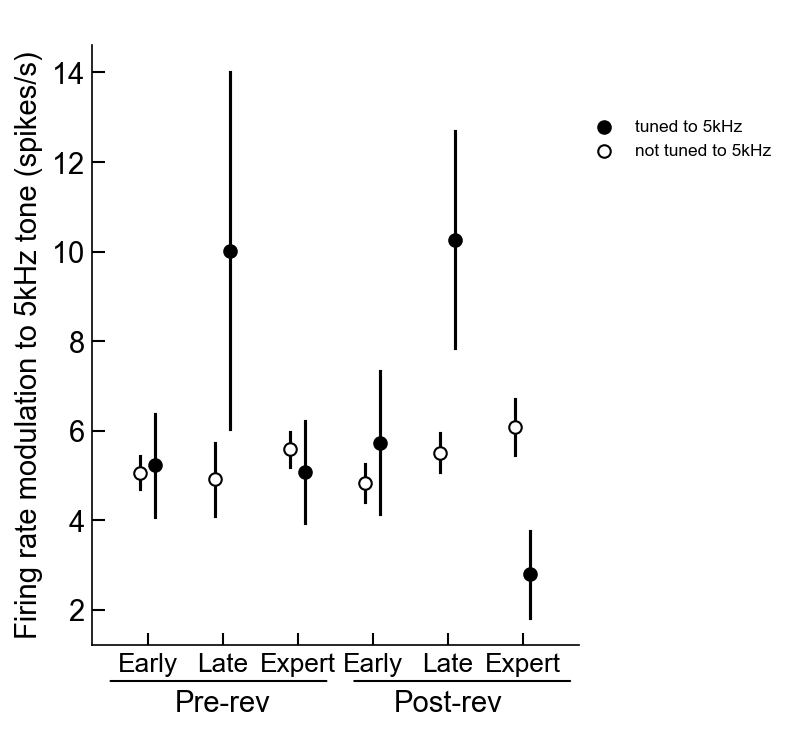

In [102]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
for idx,phase in enumerate(phases):
    tuned_FRmod = np.mean(ilep.rmnan(data[phase].tuned_to_5k_FRmod))
    tuned_FRmod_sem = sem(ilep.rmnan(data[phase].tuned_to_5k_FRmod))
    untuned_FRmod = np.mean(ilep.rmnan(data[phase].not_tuned_to_5k_FRmod))
    untuned_FRmod_sem = sem(ilep.rmnan(data[phase].not_tuned_to_5k_FRmod))
    
    plt.scatter(idx+0.1,tuned_FRmod,color='k',zorder=10)
    plt.plot([idx+0.1]*2,[tuned_FRmod-tuned_FRmod_sem,tuned_FRmod+tuned_FRmod_sem],color='k')
    
    plt.scatter(idx-0.1,untuned_FRmod,color='k',fc='white',zorder=10)
    plt.plot([idx-0.1]*2,[untuned_FRmod-untuned_FRmod_sem,untuned_FRmod+untuned_FRmod_sem],color='k')
    
plt.scatter([],[],c='k',label='tuned to 5kHz')
plt.scatter([],[],ec='k',fc='white',label='not tuned to 5kHz')

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([0.1,200])
# ax.set_yticks([0.1,1,10,100])
# ax.set_yticklabels(['0.1','1','10','100'])
ylab = ax.set_ylabel('Firing rate modulation to 5kHz tone (spikes/s)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

ttl = ax.set_title(' ')

# Y = np.mean(ax.get_ylim())
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

lgd = ax.legend(frameon=False,loc=(1,0.8))

artists = [ylab,xlab,ttl,lgd]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','FRmod tuned vs untuned 5k V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

data_tuned = SimpleNamespace(preearly=ilep.rmnan(data['pre early'].tuned_to_5k_FRmod),
prelate=ilep.rmnan(data['pre late'].tuned_to_5k_FRmod),
preexpert=ilep.rmnan(data['pre expert'].tuned_to_5k_FRmod),
postearly=ilep.rmnan(data['post early'].tuned_to_5k_FRmod),
postlate=ilep.rmnan(data['post late'].tuned_to_5k_FRmod),
postexpert=ilep.rmnan(data['post expert'].tuned_to_5k_FRmod)
)

data_untuned = SimpleNamespace(preearly=ilep.rmnan(data['pre early'].not_tuned_to_5k_FRmod),
prelate=ilep.rmnan(data['pre late'].not_tuned_to_5k_FRmod),
preexpert=ilep.rmnan(data['pre expert'].not_tuned_to_5k_FRmod),
postearly=ilep.rmnan(data['post early'].not_tuned_to_5k_FRmod),
postlate=ilep.rmnan(data['post late'].not_tuned_to_5k_FRmod),
postexpert=ilep.rmnan(data['post expert'].not_tuned_to_5k_FRmod)
)

ilep.nonparametricIndependentStatsCompareToOther(data_tuned,data_untuned)
pass

            Source             SS      DF           MS         F     p-unc  \
0            phase    5341.400172     5.0  1068.280034  4.410584  0.000538   
1          context    1011.050407     1.0  1011.050407  4.174301  0.041185   
2  phase * context    3043.906708     5.0   608.781342  2.513462  0.028155   
3         Residual  441061.323412  1821.0   242.208305       NaN       NaN   

        np2  
0  0.011965  
1  0.002287  
2  0.006854  
3       NaN  

          phase  A  B     p-unc    p-corr    hedges
16   post-early  A  B  0.530026  0.795039 -0.105899
17  post-expert  A  B  0.898761  0.948018 -0.130251
18    post-late  A  B  0.190437  0.571312 -0.083866
19    pre-early  A  B  0.047233  0.283399  0.418817
20   pre-expert  A  B  0.310359  0.620718  0.473734
21     pre-late  A  B  0.948018  0.948018  0.101520
key preearly has 49 and 394 non-nan elements
key prelate has 22 and 108 non-nan elements
key preexpert has 29 and 361 non-nan elements
key postearly has 32 and 333 non-nan el

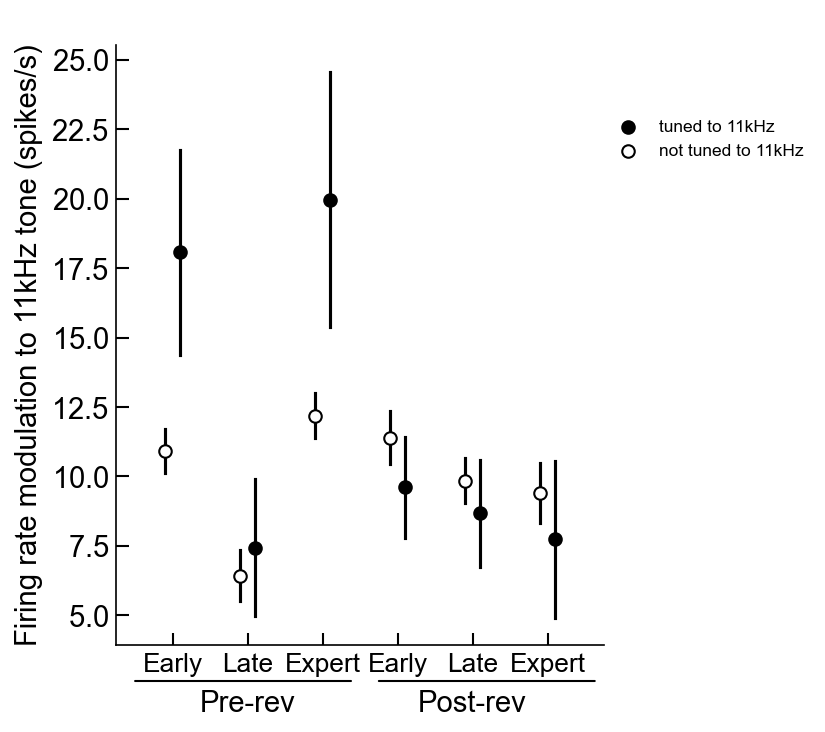

In [103]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(3.25, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mn = 3.5
spread = 2.5
    
###
    
for idx,phase in enumerate(phases):
    tuned_FRmod = np.mean(ilep.rmnan(data[phase].tuned_to_11k_FRmod))
    tuned_FRmod_sem = sem(ilep.rmnan(data[phase].tuned_to_11k_FRmod))
    untuned_FRmod = np.mean(ilep.rmnan(data[phase].not_tuned_to_11k_FRmod))
    untuned_FRmod_sem = sem(ilep.rmnan(data[phase].not_tuned_to_11k_FRmod))
    
    plt.scatter(idx+0.1,tuned_FRmod,color='k',zorder=10)
    plt.plot([idx+0.1]*2,[tuned_FRmod-tuned_FRmod_sem,tuned_FRmod+tuned_FRmod_sem],color='k')
    
    plt.scatter(idx-0.1,untuned_FRmod,color='k',fc='white',zorder=10)
    plt.plot([idx-0.1]*2,[untuned_FRmod-untuned_FRmod_sem,untuned_FRmod+untuned_FRmod_sem],color='k')
    
plt.scatter([],[],c='k',label='tuned to 11kHz')
plt.scatter([],[],ec='k',fc='white',label='not tuned to 11kHz')

################################################################################################################
labels = ['Early','Late','Expert','Early','Late','Expert']

# ax.set_ylim([0.1,200])
# ax.set_yticks([0.1,1,10,100])
# ax.set_yticklabels(['0.1','1','10','100'])
ylab = ax.set_ylabel('Firing rate modulation to 11kHz tone (spikes/s)')

ax.set_xlim([-0.75-switch_offset,5.75+switch_offset])
ax.set_xticks([0-switch_offset,1-switch_offset,2-switch_offset,3+switch_offset,4+switch_offset,5+switch_offset])
ax.set_xticklabels(labels)
# xlab = ax.set_xlabel('Passive exposure phase')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim(),Yfrac=-2*stdyfrac,log=False)
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='bottom', fontsize=stdfont,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='bottom',  fontsize=stdfont,color='k')
ax.annotate('', xy=(0.03, -stdyfrac), xycoords='axes fraction', xytext=(0.49, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -stdyfrac), xycoords='axes fraction', xytext=(0.99, -stdyfrac),arrowprops=dict(arrowstyle='-', color='black'))

ax.tick_params(direction='in', length=6, width=1)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(stdfont)
for item in (ax.get_xticklabels()):
    item.set_fontsize(stdfont*0.9)
    pass

ttl = ax.set_title(' ')

# Y = np.mean(ax.get_ylim())
# Y = 10**np.mean(np.log10(ax.get_ylim()))
# t = ax.text(2.5,Y,'Reversal',rotation=90,fontsize=stdfont,color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='center')
# ax.plot([2.5]*2,[ax.get_ylim()[0],Y*0.45],lw=1,color=SWITCH_COLOR)
# ax.plot([2.5]*2,[ax.get_ylim()[1],Y/0.45],lw=1,color=SWITCH_COLOR)

lgd = ax.legend(frameon=False,loc=(1,0.8))

artists = [ylab,xlab,ttl,lgd]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','FRmod tuned vs untuned 11k V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

data_tuned = SimpleNamespace(preearly=ilep.rmnan(data['pre early'].tuned_to_11k_FRmod),
prelate=ilep.rmnan(data['pre late'].tuned_to_11k_FRmod),
preexpert=ilep.rmnan(data['pre expert'].tuned_to_11k_FRmod),
postearly=ilep.rmnan(data['post early'].tuned_to_11k_FRmod),
postlate=ilep.rmnan(data['post late'].tuned_to_11k_FRmod),
postexpert=ilep.rmnan(data['post expert'].tuned_to_11k_FRmod)
)

data_untuned = SimpleNamespace(preearly=ilep.rmnan(data['pre early'].not_tuned_to_11k_FRmod),
prelate=ilep.rmnan(data['pre late'].not_tuned_to_11k_FRmod),
preexpert=ilep.rmnan(data['pre expert'].not_tuned_to_11k_FRmod),
postearly=ilep.rmnan(data['post early'].not_tuned_to_11k_FRmod),
postlate=ilep.rmnan(data['post late'].not_tuned_to_11k_FRmod),
postexpert=ilep.rmnan(data['post expert'].not_tuned_to_11k_FRmod)
)

ilep.nonparametricIndependentStatsCompareToOther(data_tuned,data_untuned)
pass